In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
import warnings 
warnings.filterwarnings('ignore')

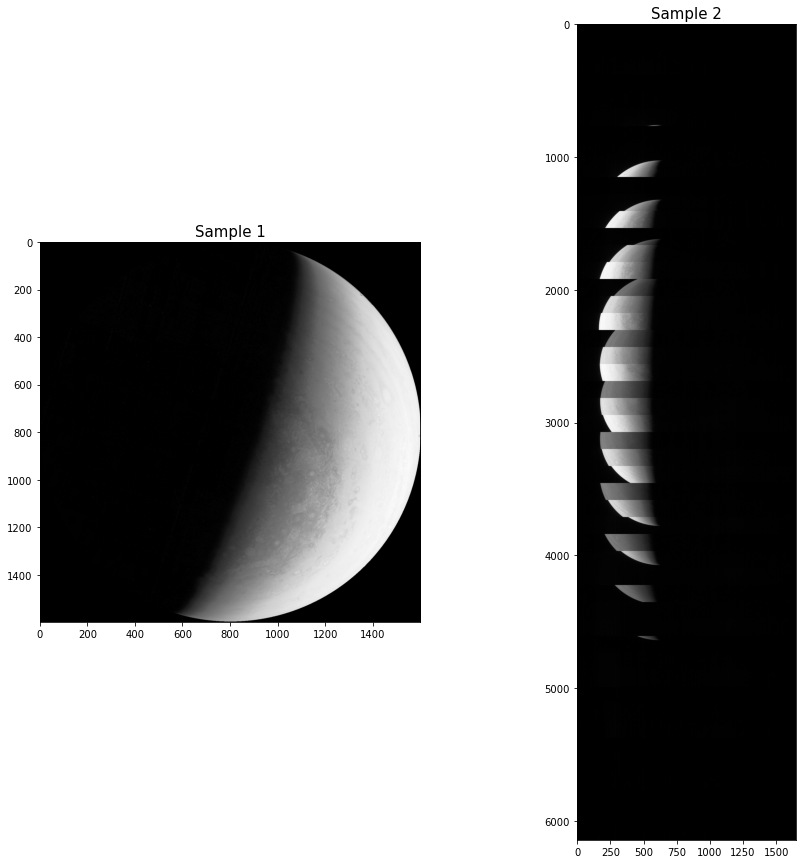

In [5]:
#read image
sample1 = imread('JNCE_2022272_45C00088_V01-red.png')
sample2 = imread('JNCE_2022272_45C00088_V01-raw.png')
#convert to gray scale
sample1_g = rgb2gray(sample1)
sample2_g = rgb2gray(sample2)
fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(sample1_g, cmap='gray')
ax[0].set_title('Sample 1',fontsize=15)
ax[1].imshow(sample2_g, cmap='gray')
ax[1].set_title('Sample 2',fontsize=15)
plt.show()

In [10]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [11]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [12]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [13]:
content_image = load_image('JNCE_2022272_45C00004_V01-blue.png')
style_image = load_image('JNCE_2022272_45C00088_V01-red.png')

In [14]:
content_image.shape

TensorShape([1, 1600, 1600, 3])

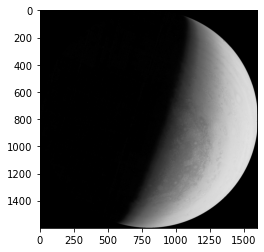

In [15]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [16]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

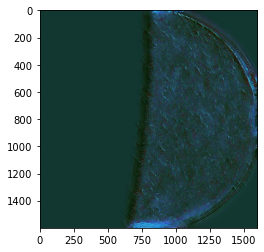

In [17]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

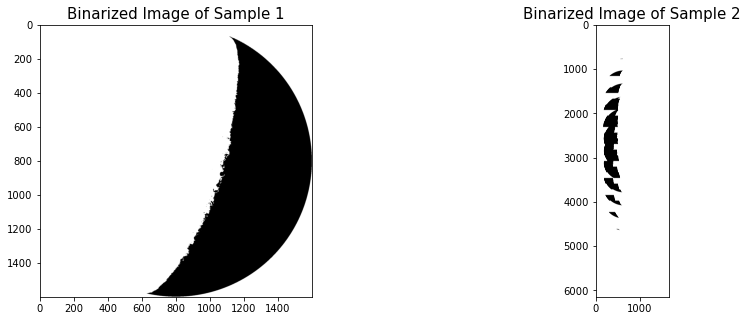

In [8]:
#binarizing using otsu
thresh1 = threshold_otsu(sample1_g)
sample1_b = sample1_g < thresh1
thresh2 = threshold_otsu(sample2_g)
sample2_b = sample2_g < thresh2
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].imshow(sample1_b,cmap='gray')
ax[0].set_title('Binarized Image of Sample 1',fontsize=15)
ax[1].imshow(sample2_b, cmap='gray')
ax[1].set_title('Binarized Image of Sample 2',fontsize=15)
plt.show()

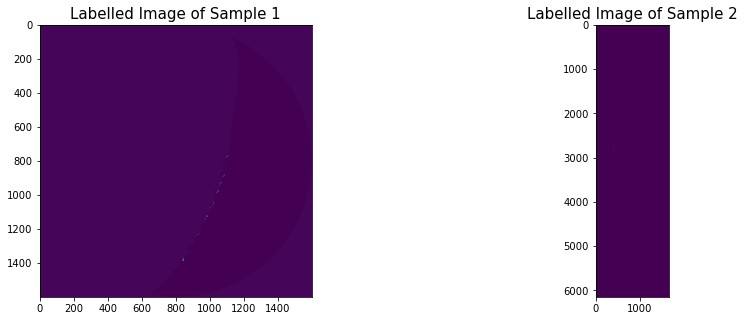

In [9]:
#using label to isolate each image
sample1_la = label(sample1_b)
sample2_la = label(sample2_b)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].imshow(sample1_la)
ax[0].set_title('Labelled Image of Sample 1',fontsize=15)
ax[1].imshow(sample2_la)
ax[1].set_title('Labelled Image of Sample 2',fontsize=15)
plt.show()

In [4]:
sample1_r=regionprops(sample1_la)
sample2_r=regionprops(sample2_la)
print('Number of Data in Sample 1: ',len(sample1_r))
print('Number of Data in Sample 2: ',len(sample2_r))

NameError: name 'regionprops' is not defined